In [1]:
import importlib
import utils
importlib.reload(utils)
from utils import *
from os import listdir
from os.path import join,basename

In [57]:
x = np.arange(6).reshape(2,3)
print(x)
x_prime = np.arange(3,9).reshape(2,3)
x_prime

[[0 1 2]
 [3 4 5]]


array([[3, 4, 5],
       [6, 7, 8]])

In [58]:
np.argwhere(x>1)

array([[0, 2],
       [1, 0],
       [1, 1],
       [1, 2]], dtype=int64)

In [59]:
x_flatten = x.flatten('F')
x_flatten

array([0, 3, 1, 4, 2, 5])

In [60]:
x_prime_flatten = x_prime.flatten('F')
x_prime_flatten

array([3, 6, 4, 7, 5, 8])

In [61]:
x_flattened_arg = np.argwhere((x_flatten>2) | (x_prime_flatten<5))
x_flattened_arg.T[0]

array([0, 1, 2, 3, 5], dtype=int64)

In [62]:
print(x)
print(x_prime)

[[0 1 2]
 [3 4 5]]
[[3 4 5]
 [6 7 8]]


In [63]:
x_arg = np.unravel_index(x_flattened_arg,(2,3),order='F')
x_arg

(array([[0],
        [1],
        [0],
        [1],
        [1]], dtype=int64),
 array([[0],
        [0],
        [1],
        [1],
        [2]], dtype=int64))

In [65]:
x_prime[x_arg]

array([[3],
       [6],
       [4],
       [7],
       [8]])

In [30]:
kSize=6 #-3 to 3, 
stepSize = (1+1/kSize)

In [31]:
np.arange(-(kSize/2),kSize/2+stepSize,stepSize)

array([-3.        , -1.83333333, -0.66666667,  0.5       ,  1.66666667,
        2.83333333,  4.        ])

In [33]:
np.linspace(-(kSize/2),kSize/2,6,endpoint=True)

array([-3. , -1.8, -0.6,  0.6,  1.8,  3. ])

In [34]:
1+1/kSize

1.1666666666666667

In [8]:
A = np.arange(9).reshape(3,3)
A

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [9]:
A1 = np.row_stack((A[-1,:],A,A[0,:]))
A = np.column_stack((A1[:,-1],A1,A1[:,0]))
A

array([[8, 6, 7, 8, 6],
       [2, 0, 1, 2, 0],
       [5, 3, 4, 5, 3],
       [8, 6, 7, 8, 6],
       [2, 0, 1, 2, 0]])

In [3]:
A = np.array([[17 ,   24  ,   1   ,  8  ,  15],
    [23  ,   5   ,  7   , 14  ,  16],
    [4   ,  6   , 13   , 20 ,   22],
    [10 ,   12   , 19  ,  21  ,   3],
    [11  ,  18   , 25  ,   2  ,   9]])

A

array([[17, 24,  1,  8, 15],
       [23,  5,  7, 14, 16],
       [ 4,  6, 13, 20, 22],
       [10, 12, 19, 21,  3],
       [11, 18, 25,  2,  9]])

In [27]:
h = np.array([[-1,0,1]])

In [22]:
scipy.ndimage.correlate(A, h,mode='constant') #same as imfilter(A,h,'corr')

array([[ 24, -16, -16,  14,  -8],
       [  5, -16,   9,   9, -14],
       [  6,   9,  14,   9, -20],
       [ 12,   9,   9, -16, -21],
       [ 18,  14, -16, -16,  -2]])

In [32]:
scipy.ndimage.correlate(A, h,mode='reflect') #same as imfilter(A,h,'corr', 'symmetric' or 'replicate', 'same')

array([[  7, -16, -16,  14,   7],
       [-18, -16,   9,   9,   2],
       [  2,   9,  14,   9,   2],
       [  2,   9,   9, -16, -18],
       [  7,  14, -16, -16,   7]])

In [31]:
scipy.signal.convolve2d(A,h,mode='same') #same as conv2('same')

array([[-24,  16,  16, -14,   8],
       [ -5,  16,  -9,  -9,  14],
       [ -6,  -9, -14,  -9,  20],
       [-12,  -9,  -9,  16,  21],
       [-18, -14,  16,  16,   2]])

In [36]:
bounMargin = 3
A_temp = np.row_stack([A[-1-bounMargin+1:,:],A,A[:bounMargin,:]])
A_period = np.column_stack([A_temp[:,-1-bounMargin+1:],A_temp,A_temp[:,:bounMargin]])
A_period
# im1_temp = [im1(end-bounMargin+1:end,:);im1;im1(1:bounMargin,:)];
# im1_period = [im1_temp(:,end-bounMargin+1:end),im1_temp,im1_temp(:,1:bounMargin)];

array([[13, 20, 22,  4,  6, 13, 20, 22,  4,  6, 13],
       [19, 21,  3, 10, 12, 19, 21,  3, 10, 12, 19],
       [25,  2,  9, 11, 18, 25,  2,  9, 11, 18, 25],
       [ 1,  8, 15, 17, 24,  1,  8, 15, 17, 24,  1],
       [ 7, 14, 16, 23,  5,  7, 14, 16, 23,  5,  7],
       [13, 20, 22,  4,  6, 13, 20, 22,  4,  6, 13],
       [19, 21,  3, 10, 12, 19, 21,  3, 10, 12, 19],
       [25,  2,  9, 11, 18, 25,  2,  9, 11, 18, 25],
       [ 1,  8, 15, 17, 24,  1,  8, 15, 17, 24,  1],
       [ 7, 14, 16, 23,  5,  7, 14, 16, 23,  5,  7],
       [13, 20, 22,  4,  6, 13, 20, 22,  4,  6, 13]])

In [37]:
A_period[bounMargin:-bounMargin,bounMargin:-bounMargin]
# fx = fx(bounMargin+1:end-bounMargin, bounMargin+1:end-bounMargin);
# fy = fy(bounMargin+1:end-bounMargin, bounMargin+1:end-bounMargin);

array([[17, 24,  1,  8, 15],
       [23,  5,  7, 14, 16],
       [ 4,  6, 13, 20, 22],
       [10, 12, 19, 21,  3],
       [11, 18, 25,  2,  9]])

In [45]:
nrow, ncol = A.shape


5

In [47]:
bord = 1
A[bord:nrow-bord,bord:ncol-bord]

array([[ 5,  7, 14],
       [ 6, 13, 20],
       [12, 19, 21]])

In [67]:
im1 = np.zeros((3,3))
uInitial = np.zeros(im1.shape)
vInitial = np.zeros(im1.shape)
uvInitial = np.stack([uInitial,vInitial],axis=2)
uvInitial.shape

(3, 3, 2)

In [70]:
im1 = np.zeros((3,3))
len(im1.shape)

2

In [71]:
A

array([[17, 24,  1,  8, 15],
       [23,  5,  7, 14, 16],
       [ 4,  6, 13, 20, 22],
       [10, 12, 19, 21,  3],
       [11, 18, 25,  2,  9]])

In [72]:
scipy.ndimage.median_filter(A,(3,3),mode='reflect')

array([[17, 17,  8,  8, 15],
       [17,  7,  8, 14, 16],
       [10, 10, 13, 16, 16],
       [10, 12, 18, 19,  9],
       [11, 18, 18,  9,  9]])

In [74]:
m,n = A.shape
m1 = m * 2 
n1 = n * 2

In [78]:
A

array([[17, 24,  1,  8, 15],
       [23,  5,  7, 14, 16],
       [ 4,  6, 13, 20, 22],
       [10, 12, 19, 21,  3],
       [11, 18, 25,  2,  9]])

In [122]:
t = np.zeros((1,n1))
for i in range(0,n1,2):
    t[0,i] = A[1,i//2]

t

array([[23.,  0.,  5.,  0.,  7.,  0., 14.,  0., 16.,  0.]])

In [123]:
conv_t = np.column_stack((0,t,A[0,0]))
conv_t

array([[ 0., 23.,  0.,  5.,  0.,  7.,  0., 14.,  0., 16.,  0., 17.]])

In [124]:
w = np.array([[0.5,1,0.5]])
scipy.signal.convolve2d(conv_t,w,mode='same')

array([[11.5, 23. , 14. ,  5. ,  6. ,  7. , 10.5, 14. , 15. , 16. , 16.5,
        17. ]])

In [127]:
m,n = A.shape
print(A.shape)
m1 = m * 2 
n1 = n * 2
result1 = np.zeros((m1,n1))
print(result1.shape)
mid = np.zeros((m,n1))
w = np.array([[0.5,1,0.5]])

for j in range(m):
    t = np.zeros((1,n1))
    for i in range(0,n1,2):
        t[0,i] = A[j,i//2]
    conv_t = np.column_stack((0,t,A[j,0]))
    tmp = scipy.signal.convolve2d(conv_t,w,mode='same')
    # print(tmp[:,1:-1].shape)
    mid[j,:n1] = tmp[:,1:-1]

mid

(5, 5)
(10, 10)


array([[17. , 20.5, 24. , 12.5,  1. ,  4.5,  8. , 11.5, 15. , 16. ],
       [23. , 14. ,  5. ,  6. ,  7. , 10.5, 14. , 15. , 16. , 19.5],
       [ 4. ,  5. ,  6. ,  9.5, 13. , 16.5, 20. , 21. , 22. , 13. ],
       [10. , 11. , 12. , 15.5, 19. , 20. , 21. , 12. ,  3. ,  6.5],
       [11. , 14.5, 18. , 21.5, 25. , 13.5,  2. ,  5.5,  9. , 10. ]])

In [128]:
for i in range(n1):
    t = np.zeros((1,m1))
    for j in range(0,m1,2):
        t[0,j] = mid[j//2,i]
    conv_t = np.column_stack((0,t,mid[0,i]))
    tmp = scipy.signal.convolve(conv_t,w,mode='same')
    result1[:,i] = tmp[:,1:-1]

result1

array([[17.  , 20.5 , 24.  , 12.5 ,  1.  ,  4.5 ,  8.  , 11.5 , 15.  ,
        16.  ],
       [20.  , 17.25, 14.5 ,  9.25,  4.  ,  7.5 , 11.  , 13.25, 15.5 ,
        17.75],
       [23.  , 14.  ,  5.  ,  6.  ,  7.  , 10.5 , 14.  , 15.  , 16.  ,
        19.5 ],
       [13.5 ,  9.5 ,  5.5 ,  7.75, 10.  , 13.5 , 17.  , 18.  , 19.  ,
        16.25],
       [ 4.  ,  5.  ,  6.  ,  9.5 , 13.  , 16.5 , 20.  , 21.  , 22.  ,
        13.  ],
       [ 7.  ,  8.  ,  9.  , 12.5 , 16.  , 18.25, 20.5 , 16.5 , 12.5 ,
         9.75],
       [10.  , 11.  , 12.  , 15.5 , 19.  , 20.  , 21.  , 12.  ,  3.  ,
         6.5 ],
       [10.5 , 12.75, 15.  , 18.5 , 22.  , 16.75, 11.5 ,  8.75,  6.  ,
         8.25],
       [11.  , 14.5 , 18.  , 21.5 , 25.  , 13.5 ,  2.  ,  5.5 ,  9.  ,
        10.  ],
       [14.  , 17.5 , 21.  , 17.  , 13.  ,  9.  ,  5.  ,  8.5 , 12.  ,
        13.  ]])

In [10]:
n, m = A.shape
print(n,m)
X,Y = np.meshgrid(np.arange(n),np.arange(m))
X = X - 1/2
Y = Y - 1/2
X,Y

5 5


(array([[-0.5,  0.5,  1.5,  2.5,  3.5],
        [-0.5,  0.5,  1.5,  2.5,  3.5],
        [-0.5,  0.5,  1.5,  2.5,  3.5],
        [-0.5,  0.5,  1.5,  2.5,  3.5],
        [-0.5,  0.5,  1.5,  2.5,  3.5]]),
 array([[-0.5, -0.5, -0.5, -0.5, -0.5],
        [ 0.5,  0.5,  0.5,  0.5,  0.5],
        [ 1.5,  1.5,  1.5,  1.5,  1.5],
        [ 2.5,  2.5,  2.5,  2.5,  2.5],
        [ 3.5,  3.5,  3.5,  3.5,  3.5]]))

In [9]:
for i in range(m):
    for j in range(n):
        if X[i,j]> n:
            X[i,j] = n
        if X[i,j] < 1:
            X[i,j] = 1
        if Y[i,j] > m:
            Y[i,j] = m
        if Y[i,j] < 1:
            Y[i,j] = 1

X,Y

(array([[1. , 1. , 1.5, 2.5, 3.5],
        [1. , 1. , 1.5, 2.5, 3.5],
        [1. , 1. , 1.5, 2.5, 3.5],
        [1. , 1. , 1.5, 2.5, 3.5],
        [1. , 1. , 1.5, 2.5, 3.5]]),
 array([[1. , 1. , 1. , 1. , 1. ],
        [1. , 1. , 1. , 1. , 1. ],
        [1.5, 1.5, 1.5, 1.5, 1.5],
        [2.5, 2.5, 2.5, 2.5, 2.5],
        [3.5, 3.5, 3.5, 3.5, 3.5]]))

In [12]:
Dxfilter = np.array([[-0.5,0,0.5]])

Dyfilter = Dxfilter.T
Dxyfilter = scipy.signal.convolve2d(Dxfilter,Dyfilter,mode='full')
Dxyfilter

array([[ 0.25,  0.  , -0.25],
       [ 0.  ,  0.  ,  0.  ],
       [-0.25,  0.  ,  0.25]])

In [15]:
XI = A.flatten('F')
XI

array([17, 23,  4, 10, 11, 24,  5,  6, 12, 18,  1,  7, 13, 19, 25,  8, 14,
       20, 21,  2, 15, 16, 22,  3,  9])

In [30]:
XI = A.flatten('F') -3/2#flatten column wise
YI = A.T.flatten('F') - 5/2

# Bound coordinates to valid region
sx = A[1:-1,1:-1].shape[1]
sy = A[1:-1,1:-1].shape[0]

# Neighbor coordinates
fXI = np.floor(XI)
cXI = fXI + 1
fYI = np.floor(YI)
cYI = fYI + 1
print(sx,sy)
print(fXI)
print(cXI)
print(fYI)
print(cYI)

3 3
[15. 21.  2.  8.  9. 22.  3.  4. 10. 16. -1.  5. 11. 17. 23.  6. 12. 18.
 19.  0. 13. 14. 20.  1.  7.]
[16. 22.  3.  9. 10. 23.  4.  5. 11. 17.  0.  6. 12. 18. 24.  7. 13. 19.
 20.  1. 14. 15. 21.  2.  8.]
[14. 21. -2.  5. 12. 20.  2.  4. 11. 13.  1.  3. 10. 17. 19.  7.  9. 16.
 18.  0.  8. 15. 22. -1.  6.]
[15. 22. -1.  6. 13. 21.  3.  5. 12. 14.  2.  4. 11. 18. 20.  8. 10. 17.
 19.  1.  9. 16. 23.  0.  7.]


In [27]:
print(fXI<1)
y = np.array(fXI<1,dtype=bool)
y.astype(int)

[False False False False False False False False False False  True False
 False False False False False False False  True False False False False
 False]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0])

In [32]:
b = (fXI <1) | (cXI >sx)
b.astype(int)

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1])

In [38]:
matlab_min = lambda m,vec: np.array([v if v < m else m for v in vec])
matlab_max = lambda m, vec: np.array([m if v < m else v for v in vec])

In [37]:
matlab_min(3,np.linspace(1,10,10,endpoint=True)) #equivalent to min(m,vec)

array([1., 2., 3., 3., 3., 3., 3., 3., 3., 3.])

In [40]:
matlab_max(4,np.linspace(1,10,10,endpoint=True)) #equivalent to max(m,vec)

array([ 4.,  4.,  4.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [41]:
matlab_max(2,matlab_min(3,np.linspace(1,10,10,endpoint=True)))

array([2., 2., 3., 3., 3., 3., 3., 3., 3., 3.])

In [43]:
XI.astype(int)

array([15, 21,  2,  8,  9, 22,  3,  4, 10, 16,  0,  5, 11, 17, 23,  6, 12,
       18, 19,  0, 13, 14, 20,  1,  7])

In [49]:
fXI = fXI.astype(int)
fXI = matlab_max(2,matlab_min(3,fXI))
fXI

array([3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 2, 3])

In [50]:
x = np.array(list(range(0,20,3)))
x

array([ 0,  3,  6,  9, 12, 15, 18])

In [54]:
A

array([[17, 24,  1,  8, 15],
       [23,  5,  7, 14, 16],
       [ 4,  6, 13, 20, 22],
       [10, 12, 19, 21,  3],
       [11, 18, 25,  2,  9]])

In [53]:
idx = np.unravel_index(x,(m,n),order='F')
A[idx]

array([17, 10,  5, 18, 13,  8, 21])

In [56]:
x = (x-1)*3 + x
x.dtype

dtype('int32')

In [60]:
A

array([[17, 24,  1,  8, 15],
       [23,  5,  7, 14, 16],
       [ 4,  6, 13, 20, 22],
       [10, 12, 19, 21,  3],
       [11, 18, 25,  2,  9]])

In [74]:
Dxfilter = np.array([[-0.5,0,0.5]])
scipy.ndimage.correlate(A, Dxfilter,mode='reflect')

array([[ 3, -8, -8,  7,  3],
       [-9, -8,  4,  4,  1],
       [ 1,  4,  7,  4,  1],
       [ 1,  4,  4, -8, -9],
       [ 3,  7, -8, -8,  3]])

In [71]:
17*0 - 0.5*17 + 0.5*24

3.5

In [75]:
np.row_stack((A,A))

array([[17, 24,  1,  8, 15],
       [23,  5,  7, 14, 16],
       [ 4,  6, 13, 20, 22],
       [10, 12, 19, 21,  3],
       [11, 18, 25,  2,  9],
       [17, 24,  1,  8, 15],
       [23,  5,  7, 14, 16],
       [ 4,  6, 13, 20, 22],
       [10, 12, 19, 21,  3],
       [11, 18, 25,  2,  9]])

In [78]:
idx_list = [idx]*3
idx_list

3

In [84]:
A_list = [A[idx].T for idx in idx_list]
A_list

[array([17, 10,  5, 18, 13,  8, 21]),
 array([17, 10,  5, 18, 13,  8, 21]),
 array([17, 10,  5, 18, 13,  8, 21])]

In [85]:
np.row_stack(A_list)

array([[17, 10,  5, 18, 13,  8, 21],
       [17, 10,  5, 18, 13,  8, 21],
       [17, 10,  5, 18, 13,  8, 21]])

In [90]:
XI

array([15.5, 21.5,  2.5,  8.5,  9.5, 22.5,  3.5,  4.5, 10.5, 16.5, -0.5,
        5.5, 11.5, 17.5, 23.5,  6.5, 12.5, 18.5, 19.5,  0.5, 13.5, 14.5,
       20.5,  1.5,  7.5])

In [91]:
XI.reshape(5,5,order='F')

array([[15.5, 22.5, -0.5,  6.5, 13.5],
       [21.5,  3.5,  5.5, 12.5, 14.5],
       [ 2.5,  4.5, 11.5, 18.5, 20.5],
       [ 8.5, 10.5, 17.5, 19.5,  1.5],
       [ 9.5, 16.5, 23.5,  0.5,  7.5]])

In [96]:
print(fXI<3)
y = np.array(fXI<3,dtype=bool)
y.astype(int)

[False False  True False False False False False False False  True False
 False False False False False False False  True False False False  True
 False]


array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0])

In [98]:
fXI[y] = 0
fXI

array([3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3,
       3, 0, 3])

In [101]:
m,n = A.shape[0], A.shape[1]
x,y = np.meshgrid(np.arange(n),np.arange(m))
x = x + 1/2
y = y + 1/2

for i in range(m):
    for j in range(n):
        if x[i,j] > n - 1:
            x[i,j] = n - 1 
        if x[i,j] < 0:
            x[i,j] = 0
        if y[i,j] > m - 1:
            y[i,j] = m - 1
        if y[i,j] < 0:
            y[i,j] = 0

x

array([[0.5, 1.5, 2.5, 3.5, 4. ],
       [0.5, 1.5, 2.5, 3.5, 4. ],
       [0.5, 1.5, 2.5, 3.5, 4. ],
       [0.5, 1.5, 2.5, 3.5, 4. ],
       [0.5, 1.5, 2.5, 3.5, 4. ]])

In [103]:
A

array([[17, 24,  1,  8, 15],
       [23,  5,  7, 14, 16],
       [ 4,  6, 13, 20, 22],
       [10, 12, 19, 21,  3],
       [11, 18, 25,  2,  9]])

In [104]:
A[list(range(0,5,2)),list(range(0,5,2))]

array([17, 13,  9])

In [106]:
list(range(0,5,2))

[0, 2, 4]

In [107]:
A[::2,::2]

array([[17,  1, 15],
       [ 4, 13, 22],
       [11, 25,  9]])

In [109]:
m,n = 5,5
x,y = np.meshgrid(np.linspace(1,n,n,endpoint=True),np.linspace(1,m,m,endpoint=True))
x = x - 1/2
y = y - 1/2

for i in range(m):
    for j in range(n):
        if x[i,j]> n:
            x[i,j] = n
        if x[i,j] < 1:
            x[i,j] = 1
        if y[i,j] > m:
            y[i,j] = m
        if y[i,j] < 1:
            y[i,j] = 1

print(x)

[[1.  1.5 2.5 3.5 4.5]
 [1.  1.5 2.5 3.5 4.5]
 [1.  1.5 2.5 3.5 4.5]
 [1.  1.5 2.5 3.5 4.5]
 [1.  1.5 2.5 3.5 4.5]]


In [112]:
m,n = 5,5
x,y = np.meshgrid(np.linspace(1,n,n,endpoint=True),np.linspace(1,m,m,endpoint=True))
x = x + 1/2
y = y + 1/2

for i in range(m):
    for j in range(n):
        if x[i,j] > n:
            x[i,j] = n
        if x[i,j] < 1:
            x[i,j] = 1
        if y[i,j] > m:
            y[i,j] = m
        if y[i,j] < 1:
            y[i,j] = 1

x

array([[1.5, 2.5, 3.5, 4.5, 5. ],
       [1.5, 2.5, 3.5, 4.5, 5. ],
       [1.5, 2.5, 3.5, 4.5, 5. ],
       [1.5, 2.5, 3.5, 4.5, 5. ],
       [1.5, 2.5, 3.5, 4.5, 5. ]])

In [113]:
y

array([[1.5, 1.5, 1.5, 1.5, 1.5],
       [2.5, 2.5, 2.5, 2.5, 2.5],
       [3.5, 3.5, 3.5, 3.5, 3.5],
       [4.5, 4.5, 4.5, 4.5, 4.5],
       [5. , 5. , 5. , 5. , 5. ]])

In [115]:
A

array([[17, 24,  1,  8, 15],
       [23,  5,  7, 14, 16],
       [ 4,  6, 13, 20, 22],
       [10, 12, 19, 21,  3],
       [11, 18, 25,  2,  9]])

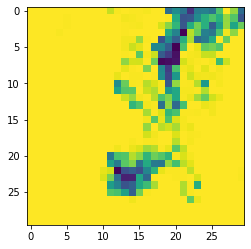

In [119]:
img = cv.imread('pics/fluid.jpg')
img_resize = cv.resize(img[:,:,0],(30,30),interpolation=cv.INTER_LINEAR)

plt.figure()
plt.imshow(img_resize)

In [122]:
cv.resize(A,(30,30),interpolation=cv.INTER_LINEAR)

error: OpenCV(4.5.4-dev) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:3929: error: (-215:Assertion failed) func != 0 in function 'cv::hal::resize'


In [126]:
x = np.stack((img_resize,img_resize),axis=2)
x.shape

(30, 30, 2)

In [ ]:
w = np.array([[1/16,1/8,1/16],[1/8,1/4,1/8],[1/16,1/8,1/16]])
mid = scipy.signal.convolve2d(A,w,mode='same')

#Step 2: interpretation
m,n = A.shape[0], A.shape[1]
x,y = np.meshgrid(np.linspace(1,n,n,endpoint=True),np.linspace(1,m,m,endpoint=True))
x = x + 1/2
y = y + 1/2

for i in range(m):
    for j in range(n):
        if x[i,j] > n:
            x[i,j] = n
        if x[i,j] < 1:
            x[i,j] = 1
        if y[i,j] > m:
            y[i,j] = m
        if y[i,j] < 1:
            y[i,j] = 1



In [54]:
m,n = A.shape
m1 = m * 2 
n1 = n * 2
result1 = np.zeros((m1,n1))
mid = np.zeros((m,n1))
w = np.array([[0.5, 1, 0.5]])

for j in range(m): #iterate across row
    t = np.zeros((1,n1))
    for i in range(0,n1,2): #expand the columns
        t[0,i] = A[j,i//2] 
    conv_t = np.column_stack((0,t,A[j,0])) #pad with 0 and first column
    tmp = scipy.signal.convolve(conv_t,w,mode='same') #to average out between across alternate columns
    mid[j,:n1] = tmp[:,1:-1]

for i in range(n1): # iterate across the expanded columns of mid
    t = np.zeros((1,m1))
    for j in range(0,m1,2): #expand the rows now
        t[0,j] = mid[j//2,i]
    conv_t = np.column_stack((0,t,mid[0,i])) #pad with 0 and first row
    tmp = scipy.signal.convolve(conv_t,w,mode='same')
    result1[:,i] = tmp[:,1:-1]

m,n = result1.shape[0], result1.shape[1]
x1 = np.linspace(1,n,n,endpoint=True)# - 1/2
y1 = np.linspace(1,m,m,endpoint=True)# - 1/2

x,y = np.meshgrid(x1,y1)

x = x - 1/2 
y = y - 1/2

result_spline = scipy.interpolate.RectBivariateSpline(x1, y1, result1)
result_spline = result_spline.ev(x,y)

for i in range(m):
    for j in range(n):
        if x[i,j]> n:
            x[i,j] = n
        if x[i,j] < 1:
            x[i,j] = 1
        if y[i,j] > m:
            y[i,j] = m
        if y[i,j] < 1:
            y[i,j] = 1


result_linear = scipy.interpolate.RegularGridInterpolator((x1, y1), result1,method='linear')
x1,y1 = np.meshgrid(x1,y1)
result_griddata = scipy.interpolate.griddata(np.column_stack((x1.ravel(),y1.ravel())), result1.ravel(), (x, y), method='linear')


result_linear = result_linear((x,y))

result1

array([[17.  , 20.5 , 24.  , 12.5 ,  1.  ,  4.5 ,  8.  , 11.5 , 15.  ,
        16.  ],
       [20.  , 17.25, 14.5 ,  9.25,  4.  ,  7.5 , 11.  , 13.25, 15.5 ,
        17.75],
       [23.  , 14.  ,  5.  ,  6.  ,  7.  , 10.5 , 14.  , 15.  , 16.  ,
        19.5 ],
       [13.5 ,  9.5 ,  5.5 ,  7.75, 10.  , 13.5 , 17.  , 18.  , 19.  ,
        16.25],
       [ 4.  ,  5.  ,  6.  ,  9.5 , 13.  , 16.5 , 20.  , 21.  , 22.  ,
        13.  ],
       [ 7.  ,  8.  ,  9.  , 12.5 , 16.  , 18.25, 20.5 , 16.5 , 12.5 ,
         9.75],
       [10.  , 11.  , 12.  , 15.5 , 19.  , 20.  , 21.  , 12.  ,  3.  ,
         6.5 ],
       [10.5 , 12.75, 15.  , 18.5 , 22.  , 16.75, 11.5 ,  8.75,  6.  ,
         8.25],
       [11.  , 14.5 , 18.  , 21.5 , 25.  , 13.5 ,  2.  ,  5.5 ,  9.  ,
        10.  ],
       [14.  , 17.5 , 21.  , 17.  , 13.  ,  9.  ,  5.  ,  8.5 , 12.  ,
        13.  ]])

In [63]:
y

array([[1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ],
       [1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5],
       [2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5],
       [3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5],
       [4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5],
       [5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5],
       [6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5, 6.5],
       [7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5],
       [8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5, 8.5],
       [9.5, 9.5, 9.5, 9.5, 9.5, 9.5, 9.5, 9.5, 9.5, 9.5]])

In [55]:
result_spline

array([[17.        , 17.33292898, 22.66707102, 19.43628693,  7.52528126,
         4.52508803,  8.93686663, 10.41494547, 10.59085151, 12.03414849],
       [17.35094255, 17.11623803, 19.75631436, 16.67325154,  7.4635618 ,
         5.42546925,  9.59753864, 11.33261039, 12.06990296, 13.57656464],
       [23.64905745, 20.48953533, 11.63791228,  7.33156854,  5.81043124,
         6.3487385 ,  9.90663733, 12.56397798, 15.02706758, 17.95146482],
       [19.67782764, 16.85824622,  7.63441094,  4.88819476,  6.92255067,
         8.87035031, 12.06857417, 14.93677438, 18.09594656, 20.08564374],
       [ 5.264632  ,  5.76022881,  6.01669493,  7.59749323, 10.09459553,
        12.80319542, 16.03033965, 19.06596351, 23.25643524, 22.21835864],
       [ 1.63864437,  3.30556643,  6.78158146, 10.00789097, 13.18143542,
        15.88883654, 18.43982493, 19.82399731, 20.85317681, 18.10511985],
       [ 6.55579054,  8.02858749, 11.03339722, 13.95106394, 17.16713555,
        19.11144632, 21.15543628, 18.27838173

In [56]:
result_linear

array([[17.    , 18.5   , 21.5   , 18.25  ,  8.75  ,  5.5   ,  8.5   ,
        10.25  , 10.75  , 12.5   ],
       [18.75  , 18.6875, 18.5625, 15.    ,  8.    ,  6.    ,  9.    ,
        11.0625, 12.1875, 14.25  ],
       [22.25  , 19.0625, 12.6875,  8.5   ,  6.5   ,  7.    , 10.    ,
        12.6875, 15.0625, 17.75  ],
       [18.25  , 15.0625,  8.6875,  6.0625,  7.1875,  9.25  , 12.25  ,
        15.25  , 18.25  , 19.375 ],
       [ 6.75  ,  6.6875,  6.5625,  7.6875, 10.0625, 12.75  , 15.75  ,
        18.75  , 21.75  , 19.125 ],
       [ 2.75  ,  4.25  ,  7.25  , 10.25  , 13.25  , 15.9375, 18.3125,
        19.4375, 19.3125, 15.125 ],
       [ 6.25  ,  7.75  , 10.75  , 13.75  , 16.75  , 18.8125, 19.9375,
        17.3125, 10.9375,  7.375 ],
       [ 9.75  , 10.9375, 13.3125, 16.    , 19.    , 19.5   , 17.5   ,
        13.3125,  6.9375,  5.25  ],
       [13.25  , 13.8125, 14.9375, 17.    , 20.    , 18.    , 11.    ,
         7.4375,  7.3125,  8.75  ],
       [15.5   , 16.0625, 17.1875, 17

In [57]:
result_griddata

array([[17.   , 18.75 , 22.25 , 18.25 ,  6.75 ,  2.75 ,  6.25 ,  9.75 ,
        13.25 , 15.5  ],
       [18.5  , 17.125, 17.5  , 13.5  ,  8.25 ,  4.25 ,  7.75 , 10.625,
        14.125, 16.375],
       [21.5  , 17.   , 14.25 , 10.25 ,  8.125,  7.25 , 10.75 , 13.625,
        14.625, 16.875],
       [18.25 , 13.75 ,  7.25 ,  6.375,  8.   , 10.25 , 13.75 , 16.   ,
        17.   , 16.125],
       [ 8.75 ,  6.75 ,  7.75 ,  6.875,  9.75 , 13.25 , 16.75 , 19.   ,
        20.   , 19.125],
       [ 5.5  ,  6.   ,  7.   ,  9.25 , 12.75 , 16.25 , 19.125, 18.25 ,
        16.75 , 12.75 ],
       [ 8.5  ,  9.   , 10.   , 12.25 , 15.75 , 18.   , 20.25 , 16.25 ,
        12.25 ,  6.375],
       [10.25 , 11.375, 12.375, 15.25 , 18.75 , 21.   , 15.75 , 11.75 ,
         9.   ,  6.25 ],
       [10.75 , 11.875, 15.375, 18.25 , 21.75 , 20.875,  9.375,  8.5  ,
         5.75 ,  8.   ],
       [12.5  , 14.25 , 17.75 , 21.25 , 21.   , 17.   ,  5.5  ,  5.25 ,
         8.75 , 11.   ]])

In [46]:
def func(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2

grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]

rng = np.random.default_rng()
points = np.column_stack((np.linspace(0,100,1000),np.linspace(0,100,1000)))#rng.random((1000, 2))

values = func(points[:,0], points[:,1])
grid_z0 = scipy.interpolate.griddata(points, values, (grid_x, grid_y), method='nearest')
print(points.shape)
print(values.shape)
print(grid_x.shape)

(1000, 2)
(1000,)
(100, 200)


In [59]:
grid_y.shape

(100, 200)

In [60]:
values.shape

(1000,)

In [61]:
points = np.column_stack((x1,y1))
print(points.shape)
values = result1.ravel()
print(values.shape)
result_griddata = scipy.interpolate.griddata(points, values, (x, y), method='linear')


(10, 20)
(100,)


ValueError: different number of values and points

In [227]:
import importlib
import OF_plume.Horn_Schunck
importlib.reload(OF_plume.Horn_Schunck)
from OF_plume.Horn_Schunck import *
from PIL import Image
from os import listdir
from os.path import join,basename

In [211]:
para = PARA(pyramid_level=3,warp_iter=2,iter=400,boundaryCondition='periodical',interpolation_method='linear',isMedianFilter=True,sizeOfMF=(5,5))

# initialize the velocity field
uInitial = np.zeros((256,256))
vInitial = np.zeros((256,256))
uvInitial = np.stack([uInitial,vInitial],axis=2)

In [212]:
turbulence_file = [join('coarse_to_fine_HS_PIV/data',f) for f in listdir('coarse_to_fine_HS_PIV/data') if 'DNS_turbulence_00001' in f and f.endswith('.tif')]
turbulence_img = [cv.cvtColor(cv.imread(f),cv.COLOR_BGR2RGB) for f in turbulence_file]
turbulence_file

['coarse_to_fine_HS_PIV/data\\DNS_turbulence_00001_img1.tif',
 'coarse_to_fine_HS_PIV/data\\DNS_turbulence_00001_img2.tif']

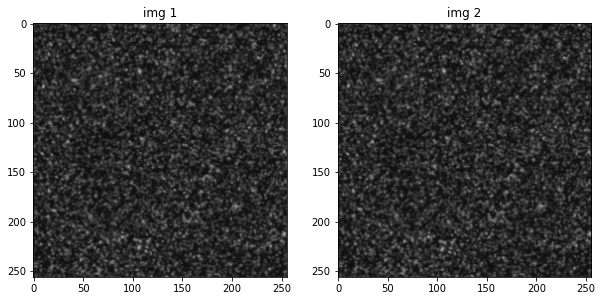

In [213]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
for i,(ax,im) in enumerate(zip(axes.flatten(),turbulence_img)):
    ax.imshow(im)
    ax.set_title(f'img {i+1}')

plt.show()

## Compute the variational optical flow

In [214]:
lamb = 10
im1, im2 = turbulence_img
u,v = HS_pyramids(im1,im2,lamb=lamb,PARA=para)

Pyramid Level 2
Pyramid Level 1
Pyramid Level 0


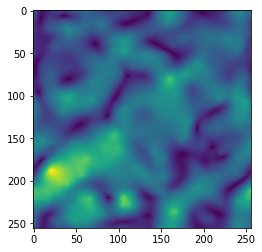

In [215]:
plt.figure()
plt.imshow(np.sqrt(u**2+v**2))

In [201]:
uv_sq = np.sqrt(u**2+v**2)
uv = np.stack((u,v),axis=2)
uv.shape

(256, 256, 2)

In [216]:
vort = computeCurl(uv)

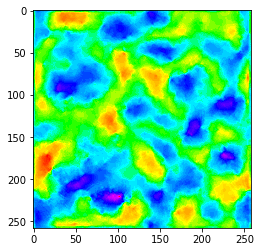

In [232]:
fig,ax = plt.subplots()
ax.imshow(vort,cmap=get_colormap(1))



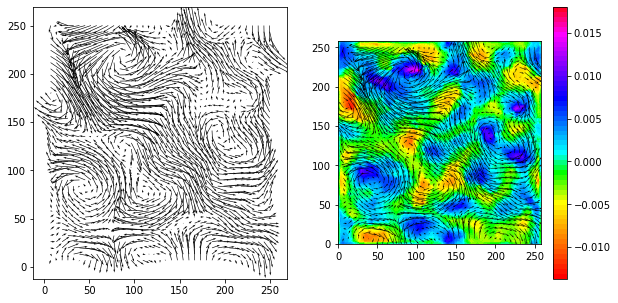

In [228]:
# plotFlow(u,v,step=1)
plotFlow(u,v,vort,step=1)

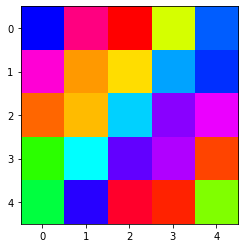

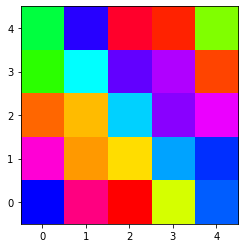

In [220]:
plt.figure()
plt.imshow(A,cmap=get_colormap(1))
plt.show()

plt.figure()
plt.imshow(A,cmap=get_colormap(1),origin='lower')
plt.show()

In [171]:
A_copy = A.copy()
A_copy = A_copy.astype(float)
A_copy[A_copy<10] = np.nan
A_copy

array([[17., 24., nan, nan, 15.],
       [23., nan, nan, 14., 16.],
       [nan, nan, 13., 20., 22.],
       [10., 12., 19., 21., nan],
       [11., 18., 25., nan, nan]])

In [172]:
A_copy1 = A.copy()
A_copy1 = A_copy1.astype(float)
A_copy1[A_copy1<14] = np.nan
A_copy1

array([[17., 24., nan, nan, 15.],
       [23., nan, nan, 14., 16.],
       [nan, nan, nan, 20., 22.],
       [nan, nan, 19., 21., nan],
       [nan, 18., 25., nan, nan]])

In [173]:
np.isnan(A_copy)

array([[False, False,  True,  True, False],
       [False,  True,  True, False, False],
       [ True,  True, False, False, False],
       [False, False, False, False,  True],
       [False, False, False,  True,  True]])

In [174]:
np.isnan(A_copy) | np.isnan(A_copy1)

array([[False, False,  True,  True, False],
       [False,  True,  True, False, False],
       [ True,  True,  True, False, False],
       [ True,  True, False, False,  True],
       [ True, False, False,  True,  True]])

In [175]:
A_copy[np.isnan(A_copy)] = 0
A_copy

array([[17., 24.,  0.,  0., 15.],
       [23.,  0.,  0., 14., 16.],
       [ 0.,  0., 13., 20., 22.],
       [10., 12., 19., 21.,  0.],
       [11., 18., 25.,  0.,  0.]])

In [176]:
idx = A <=10
idx

array([[False, False,  True,  True, False],
       [False,  True,  True, False, False],
       [ True,  True, False, False, False],
       [ True, False, False, False,  True],
       [False, False, False,  True,  True]])

In [177]:
A[idx]

array([ 1,  8,  5,  7,  4,  6, 10,  3,  2,  9])

In [178]:
A[~idx]

array([17, 24, 15, 23, 14, 16, 13, 20, 22, 12, 19, 21, 11, 18, 25])

In [179]:
idx.astype(int)

array([[0, 0, 1, 1, 0],
       [0, 1, 1, 0, 0],
       [1, 1, 0, 0, 0],
       [1, 0, 0, 0, 1],
       [0, 0, 0, 1, 1]])

In [180]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [181]:
cw = makeColorwheel()

In [182]:
cw.shape

(55, 3)

In [183]:
cw_swap = np.swapaxes(cw[:,:,np.newaxis],1,2)
cw_swap.shape

(55, 1, 3)

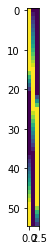

In [184]:
plt.figure()
plt.imshow(cw)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


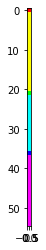

In [185]:
plt.figure()
plt.imshow(cw_swap)

In [186]:
cw_alpha = np.column_stack((cw/255,np.ones(cw.shape[0])))
cw_alpha

array([[1.        , 0.        , 0.        , 1.        ],
       [1.        , 0.06666667, 0.        , 1.        ],
       [1.        , 0.13333333, 0.        , 1.        ],
       [1.        , 0.2       , 0.        , 1.        ],
       [1.        , 0.26666667, 0.        , 1.        ],
       [1.        , 0.33333333, 0.        , 1.        ],
       [1.        , 0.4       , 0.        , 1.        ],
       [1.        , 0.46666667, 0.        , 1.        ],
       [1.        , 0.53333333, 0.        , 1.        ],
       [1.        , 0.6       , 0.        , 1.        ],
       [1.        , 0.66666667, 0.        , 1.        ],
       [1.        , 0.73333333, 0.        , 1.        ],
       [1.        , 0.8       , 0.        , 1.        ],
       [1.        , 0.86666667, 0.        , 1.        ],
       [1.        , 0.93333333, 0.        , 1.        ],
       [1.        , 1.        , 0.        , 1.        ],
       [0.83529412, 1.        , 0.        , 1.        ],
       [0.66666667, 1.        ,

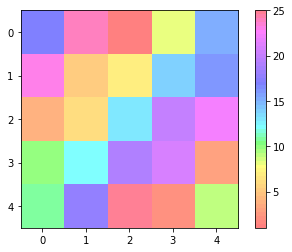

In [187]:
from matplotlib.colors import ListedColormap
cw_alpha = np.column_stack((cw/255,np.ones(cw.shape[0])*0.5))
cw_alpha
cmap = ListedColormap(cw_alpha)
plt.figure()
plt.imshow(A,cmap=cmap)
plt.colorbar()

In [188]:
A_bool = A < 10
A_copy = np.repeat(A_bool[:, :, np.newaxis],3,axis=2)
A_copy.shape

(5, 5, 3)

In [189]:
A_copy[:,:,0]

array([[False, False,  True,  True, False],
       [False,  True,  True, False, False],
       [ True,  True, False, False, False],
       [False, False, False, False,  True],
       [False, False, False,  True,  True]])

In [190]:
A

array([[17, 24,  1,  8, 15],
       [23,  5,  7, 14, 16],
       [ 4,  6, 13, 20, 22],
       [10, 12, 19, 21,  3],
       [11, 18, 25,  2,  9]])

In [191]:
np.arange(0.5,5+5/40,5/40)

array([0.5  , 0.625, 0.75 , 0.875, 1.   , 1.125, 1.25 , 1.375, 1.5  ,
       1.625, 1.75 , 1.875, 2.   , 2.125, 2.25 , 2.375, 2.5  , 2.625,
       2.75 , 2.875, 3.   , 3.125, 3.25 , 3.375, 3.5  , 3.625, 3.75 ,
       3.875, 4.   , 4.125, 4.25 , 4.375, 4.5  , 4.625, 4.75 , 4.875,
       5.   ])

In [192]:
u = A.copy()
s = u.shape
rSize = np.max(s)/40 #resolution of mesh (size of grid size)

# display vector field
Y = np.linspace(1,u.shape[0],u.shape[0],endpoint=True)
X = np.linspace(1,u.shape[1],u.shape[1],endpoint=True)
x,y = np.meshgrid(X,Y)
X1,Y1 = np.arange(0.5,u.shape[1]+rSize,rSize),np.arange(0.5,u.shape[0]+rSize,rSize)
x1,y1 = np.meshgrid(X1,Y1)

In [193]:
u_mesh = scipy.interpolate.griddata(np.column_stack((x.ravel(),y.ravel())), u.ravel(), (x1, y1), method='linear')

In [194]:
u_mesh[:7,:7]

array([[   nan,    nan,    nan,    nan,    nan,    nan,    nan],
       [   nan,    nan,    nan,    nan,    nan,    nan,    nan],
       [   nan,    nan,    nan,    nan,    nan,    nan,    nan],
       [   nan,    nan,    nan,    nan,    nan,    nan,    nan],
       [   nan,    nan,    nan,    nan, 17.   , 17.875, 18.75 ],
       [   nan,    nan,    nan,    nan, 17.75 , 18.625, 19.5  ],
       [   nan,    nan,    nan,    nan, 18.5  , 19.375, 20.25 ]])

ValueError: Argument U has a size 703 which does not match 19, the number of arrow positions

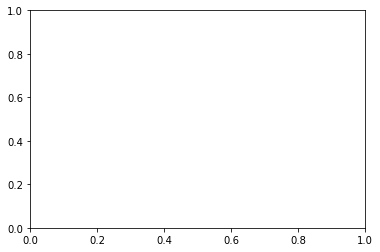

In [195]:
plt.figure()
plt.quiver(X1[::2],Y1[::2],u_mesh[::2],u_mesh[::2],scale=1)
plt.show()

In [ ]:
import h5py
f = h5py.File('coarse_to_fine_HS_PIV\tools\BuYlRd.mat','r')
f.keys()

OSError: Unable to open file (unable to open file: name = 'coarse_to_fine_HS_PIV	ools\BuYlRd.mat', errno = 22, error message = 'Invalid argument', flags = 0, o_flags = 0)